## Aufgabe
- Lade aus Sklearn den Datensatz `iris` und erstelle daraus ein Dataframe
- Erzeuge ein Klassifikationsmodell deiner Wahl und trainiere und teste das Modell 
- Erstelle ein SearchGrid-Modell mit verschiedenen Parametern und vergleiche dann das Ergebnis zum ersten Modell, das du bereits erzeugt und getestet hast.

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Iris_versicolor_1.jpg/800px-Iris_versicolor_1.jpg' width='350px;' /></center>

## Datensatz laden und Dataframe erstellen

In [187]:
from sklearn.datasets import load_iris # die Funktion load_iris

In [188]:
iris = load_iris() # den Datensatz laden

In [189]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [190]:
iris.feature_names # Merkmalsnamen

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [191]:
iris.target_names # Klassen

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [192]:
import pandas as pd
df = pd.DataFrame(
    data=iris.data,
    columns=iris.feature_names)
df.shape # Dataframe erzeugt

(150, 4)

In [193]:
df['target'] = iris.target # Spalte Target hinzufügen

In [194]:
df.head() # Überblick

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [195]:
df['target'].value_counts() # die Uniques anzeigen und ihre Frequenzen: 3 Klassen und jeweils 50 samples

target
0    50
1    50
2    50
Name: count, dtype: int64

In [196]:
for i in range(len(iris.target_names)):
    print(iris.target_names[i])

setosa
versicolor
virginica


In [197]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Datenmodell erstellen, trainieren und testen

In [198]:
from sklearn.model_selection import train_test_split # Daten aufgesplitted

X=df.drop('target', axis=1)
y=df.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42) # Testsize quasi 30% (50 Samples)

In [199]:
from sklearn.svm import SVC

In [200]:
svc_model =  SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=True,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=1000,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None) # Ein Modell (svc)

In [201]:
svc_model.fit(X_train,y_train) # Modell trainieren

SVC(max_iter=1000, probability=True)

In [202]:
svc_model.score(X_test, y_test) # 100% Score: Datensatz viel zu klein, oder irgend etwas stimmt nicht hier ..

1.0

## Confusion Matrix

In [203]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = y_test # Wahre Werte
y_pred = svc_model.predict(X_test) # Schätzung
confusion_matrix(y_true, y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])

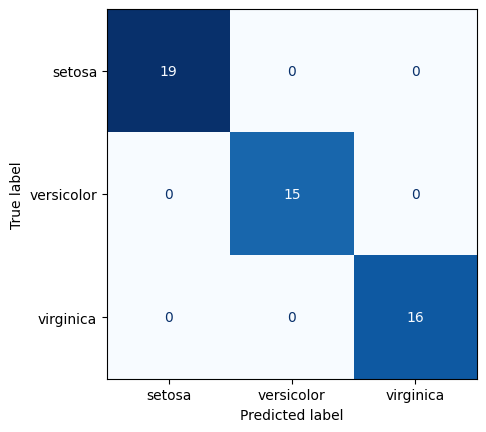

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)
disp.plot(cmap="Blues", colorbar=False)
plt.show();

## Classification Report

In [205]:
from sklearn.metrics import classification_report

In [206]:
report=classification_report(y_true,y_pred)
print(report) # Eine Genauigkeit von 100% -- alarm! das Modell lernt auswendig

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



## GridSearch Modell

In [207]:
from sklearn.model_selection import GridSearchCV # GridSearch Modell 
# Parameter
param_grid = {
    'C' : [0.1, 1,10,100,1000],
    'gamma' : [1.0, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : [ 'rbf', 'sigmoid']}

In [208]:
grid = GridSearchCV(
                   SVC(),
                   param_grid,
                   refit=True,
                   verbose=3) # GS-Modell erstellen

In [209]:
grid.fit(X_train,y_train) # Modell trainieren

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ......C=0.1, gamma=1.0, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=1.0, kernel=rbf;, score=0.850 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=1.0, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=1.0, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=1.0, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=1.0, kernel=sigmoid;, score=0.350 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=1.0, kernel=sigmoid;, score=0.350 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=1.0, kernel=sigmoid;, score=0.350 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=1.0, kernel=sigmoid;, score=0.350 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=1.0, kernel=sigmoid;, score=0.300 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.850 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf


[CV 4/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.350 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.350 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.350 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.350 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.350 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.450 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.350 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.350 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.350 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.350 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.450 total time=   0.0s
[CV 1/5] END ........C

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1.0, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [210]:
grid.best_params_ # die bestmögliche Parameter-Kombination

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [211]:
grid.best_estimator_ # das bestmögliche Modell

SVC(C=100, gamma=0.01)

In [212]:
grid_pred = grid.predict(X_test) # Prediction 

In [213]:
cm = confusion_matrix(y_test, grid_pred) # Confusion-Matrix

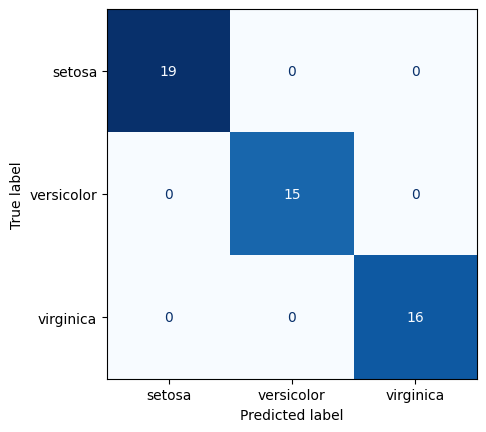

In [214]:
disp = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)
disp.plot(cmap="Blues", colorbar=False)
plt.show()

In [215]:
# Im Vergleich zu SVC kein Unterschied

## Optional: noch weitere Algorithmen ausprobieren

In [216]:
from sklearn.ensemble import GradientBoostingClassifier

In [217]:
gbc = GradientBoostingClassifier() # ein Modell erstellen
print('Ein Modell "GradientBoostingClassifier" erstellt.')

Ein Modell "GradientBoostingClassifier" erstellt.


In [218]:
gbc.fit(X_train,y_train) # Modell trainieren
print('Das Modell ist jetzt trainiert.')

Das Modell ist jetzt trainiert.


In [219]:
y_pred = gbc.predict(X_test) # Prediction

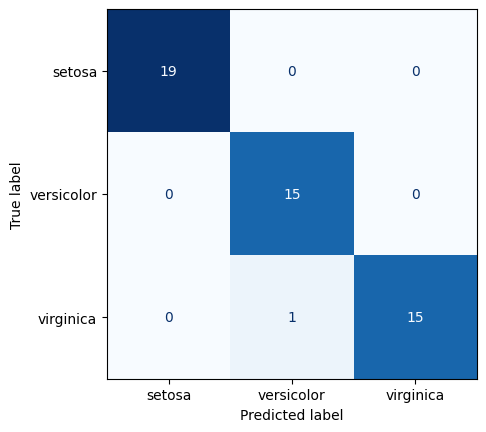

In [220]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)
disp.plot(cmap="Blues", colorbar=False)
plt.show()

In [221]:
# wie man sieht, in einem einzigen Fall hast das Modell gesagt 'versicolor'
# während in der Realität 'virginica' korrekt ist.